![Credit card being held in hand](credit_card.jpg)

Commercial banks receive _a lot_ of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this workbook, you will build an automatic credit card approval predictor using machine learning techniques, just like real banks do.

### The Data

The data is a small subset of the Credit Card Approval dataset from the UCI Machine Learning Repository showing the credit card applications a bank receives. This dataset has been loaded as a `pandas` DataFrame called `cc_apps`. The last column in the dataset is the target value.

In [116]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load the dataset
cc_apps = pd.read_csv("cc_approvals.data", header=None) 
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+


## Preprocess the data

In [117]:
#Checking missing values 
cc_apps.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [118]:
cc_apps.shape

(690, 14)

In [119]:
columns_with_missing_vals = [0,1,3, 4, 5, 6]

In [120]:
# Replace '?' with NaN
cc_apps.replace('?', np.nan, inplace=True)

In [121]:
from sklearn.impute import SimpleImputer
# Initialize the SimpleImputer with strategy 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to each column with missing values
for col in columns_with_missing_vals:
    cc_apps.iloc[:, col] = imputer.fit_transform(cc_apps[[col]])


In [122]:
cc_apps.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [123]:
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+


In [124]:
cols_to_be_encoded = [0,1,3,4,5,6,8,9,11,13]
# Get the column names to be encoded
columns_to_encode = cc_apps.columns[cols_to_be_encoded]

# Apply one-hot encoding
cc_apps_encoded = pd.get_dummies(cc_apps, columns=columns_to_encode)


## Prepare the data for modeling

In [125]:
# Select the last column as the target variable
target_var = cc_apps_encoded.iloc[:, -1].values

# Drop the last column from the features
features = cc_apps_encoded.iloc[:, :-1].values

x_train, x_test, y_train, y_test = train_test_split(features, target_var, test_size=0.2, random_state=10)


In [126]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [127]:
logreg = LogisticRegression()
logreg.fit(x_train_scaled,y_train)

LogisticRegression()

In [128]:
y_pred = logreg.predict(x_test_scaled)

In [129]:
cm = confusion_matrix(y_test, y_pred)

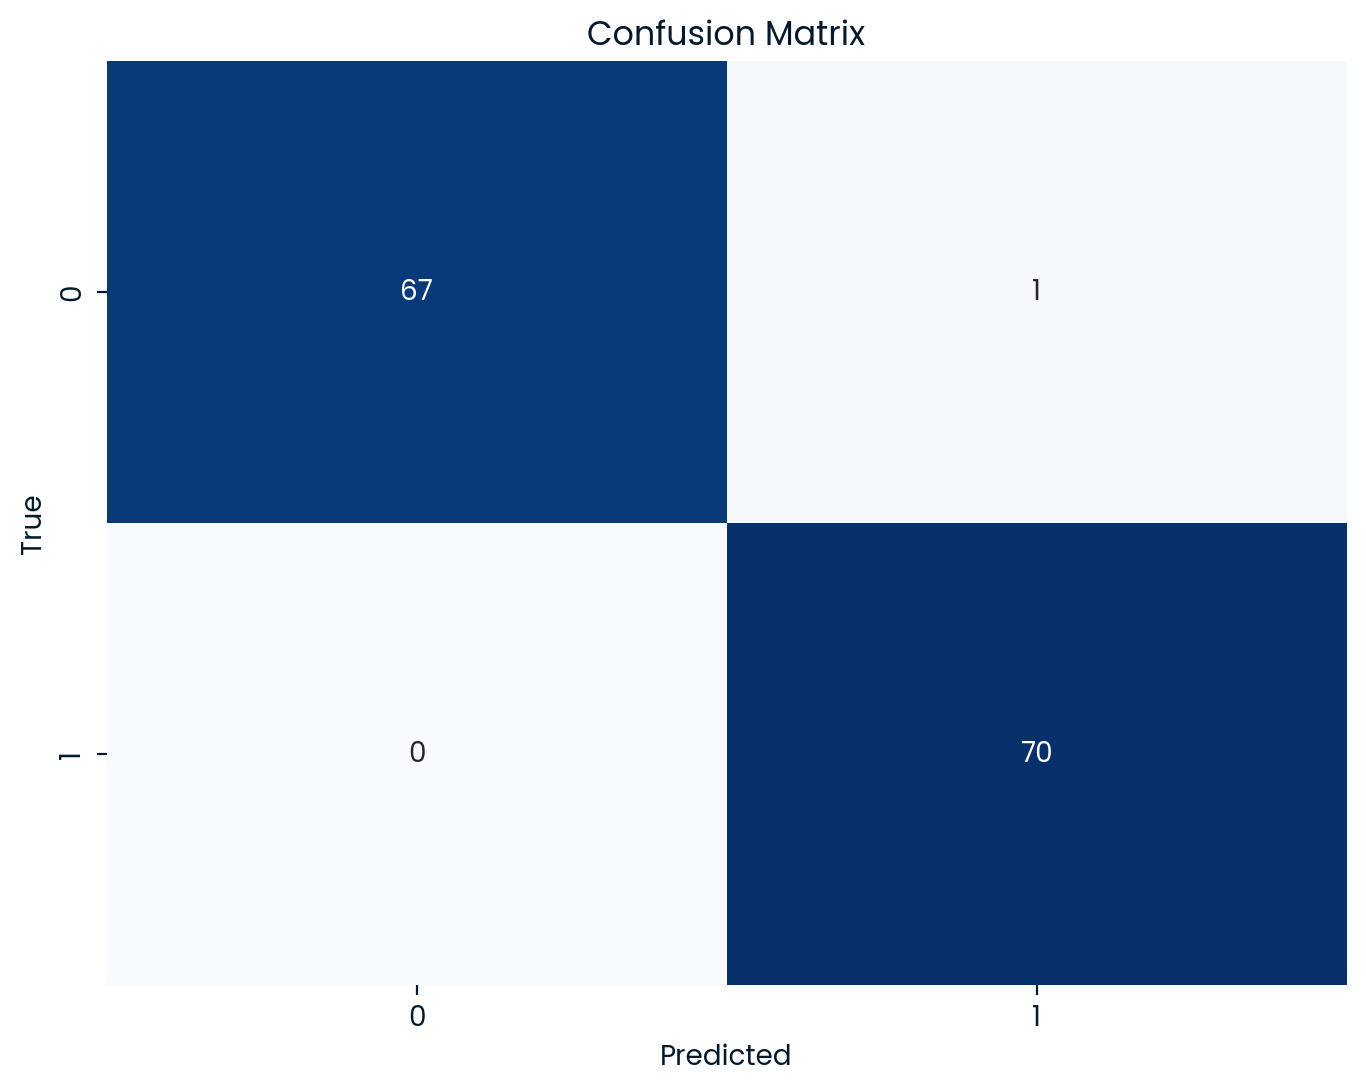

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [131]:
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(x_train_scaled, y_train)

# Summarize results
best_train_score, best_train_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_train_score, best_train_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
best_score =  best_model.score(x_test_scaled, y_test)

print("Accuracy of logistic regression classifier: ", best_score)

Best: 0.983686 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  0.9927536231884058
